<a href="https://colab.research.google.com/github/rm3887/NLU-Project-RoBERTa/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/rm3887/NLU-Project-RoBERTa/master/modlog%20-%20modlog.csv'
df = pd.read_csv(url)

In [0]:
df.drop(['Mod_Name', 'Removal_Reason'], inplace = True, axis=1)

In [0]:
df.replace('approvecomment', 1, inplace=True)
df.replace('removecomment', 0, inplace=True)
df.replace('\n',' ', regex=True, inplace = True)

In [0]:
df.Text = df.Text.str.replace('\t', ' ')

In [0]:
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)

df = df.sample(frac=1)

test_df = df[:test_size]
val_df = df[test_size: test_size + val_size]
train_df = df[test_size + val_size: ]

In [0]:
def percentages(target_df, total_df):
  return len(target_df)/len(total_df)

In [0]:
print("DF size: ", percentages(df,df))
print("TRAIN_DF size: ", percentages(train_df,df))
print("VAL_DF size: ", percentages(val_df,df))
print("TEST_DF size: ", percentages(test_df,df))

DF size:  1.0
TRAIN_DF size:  0.700058582308143
VAL_DF size:  0.14997070884592853
TEST_DF size:  0.14997070884592853


In [0]:
train_df

,Text,Action
342,Lmao Kobe even shaved his moustache like Jorda...,1
544,"If you raise minimum wage, you raise the wages...",1
10098,This why a National Lockdown would be crazy. ...,0
1538,My hatred cannot he captured with just one com...,1
1962,Kobe only cares about the W,1
...,...,...
1310,They live in Indiana. This is all they have to...,1
2461,The mods are ridiculous: https://imgur.com/o10...,1
9030,Hopefully selling your team is a symptom of co...,0
13012,...are you fucking retarded?,0


In [0]:
train_df.to_csv("/tmp/data/train.tsv", sep='\t', index=False, header=True)
val_df.to_csv("/tmp/data/dev.tsv", sep='\t', index=False, header=True)
test_df.to_csv("/tmp/data/test.tsv", sep='\t', index=False, header=True)

In [0]:
import shutil
!zip -r /content/reddit_data.zip /tmp/data/

shutil.move("/content/reddit_data.zip", "/content/drive/My Drive/Colab Notebooks/NLU/")

  adding: tmp/data/ (stored 0%)
  adding: tmp/data/train.tsv (deflated 58%)
  adding: tmp/data/dev.tsv (deflated 58%)
  adding: tmp/data/test.tsv (deflated 57%)


'/content/drive/My Drive/Colab Notebooks/NLU/reddit_data.zip'

In [0]:
print(max(train_df.Text.str.len()))
print(max(val_df.Text.str.len()))
print(max(test_df.Text.str.len()))

9944.0
6988.0
6989.0


In [0]:
url = 'https://raw.githubusercontent.com/rm3887/NLU-Project-RoBERTa/master/roberta-results.csv'

In [0]:
results = pd.read_csv(url)

In [4]:
best = results.iloc[results.groupby(['BATCH_SIZE'])['ACCURACY'].idxmax()].reset_index().drop('index', axis=1)
best

,BATCH_SIZE,SEQ_LENGTH,LEARNING RATE,ACCURACY,PRECISION,RECALL,F1 SCORE
0,8,64,0.00001,0.759277,0.536290,0.496269,0.515504
1,16,256,0.00005,0.759766,0.547826,0.470149,0.506024
2,32,256,0.00005,0.765625,0.559322,0.492537,0.523810
3,64,256,0.00005,0.761230,0.554023,0.449627,0.496395
4,128,64,0.00010,0.752930,0.531250,0.475746,0.501969


Baseline model found at https://github.com/anushapatil5/NLU-ContentModeration

In [0]:
from_baseline_acc = [0.744140625, 0.74560546875, 0.74658203125, 0.73876953125, 0.7265625]

In [6]:
max(from_baseline_acc)

0.74658203125

In [0]:
bar_y = [max(from_baseline_acc), best['ACCURACY'].max()]
bar_x = ['baseline', 'RoBERTa']

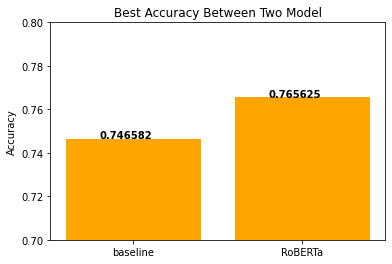

In [8]:
import matplotlib.pyplot as plt
import math

low = min(bar_y)
high = max(bar_y)
plt.bar(bar_x, bar_y, color = 'orange')
plt.ylim((0.7,0.8))
plt.ylabel("Accuracy")
plt.title("Best Accuracy Between Two Model")
for i, v in enumerate(bar_y):
    plt.text(i-0.2, v, "{:.8}".format(str(v)), color='black', fontweight='bold')

In [9]:
results

,BATCH_SIZE,SEQ_LENGTH,LEARNING RATE,ACCURACY,PRECISION,RECALL,F1 SCORE
0,8,256,0.00001,0.750488,0.539652,0.520524,0.529915
1,8,256,0.00005,0.738281,0.000000,0.000000,0.000000
2,8,256,0.00010,0.738281,0.000000,0.000000,0.000000
3,8,256,0.00050,0.738281,0.000000,0.000000,0.000000
4,8,256,0.00100,0.738281,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
99,128,32,0.00005,0.729980,0.483168,0.455224,0.468780
100,128,32,0.00010,0.737793,0.496970,0.152985,0.233951
101,128,32,0.00050,0.738281,0.000000,0.000000,0.000000
102,128,32,0.00100,0.738281,0.000000,0.000000,0.000000
